In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/credit-risk-dataset


📊 Credit Risk Management & Prediction System
Project Overview:
- Advanced data preprocessing and feature engineering
- Comprehensive exploratory data analysis
- Machine learning pipeline for credit risk prediction
- Model evaluation and business insights
✅ Loaded real credit risk dataset from Kaggle

Dataset Shape: (32581, 12)
Memory Usage: 9.62 MB

DATASET OVERVIEW
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14        

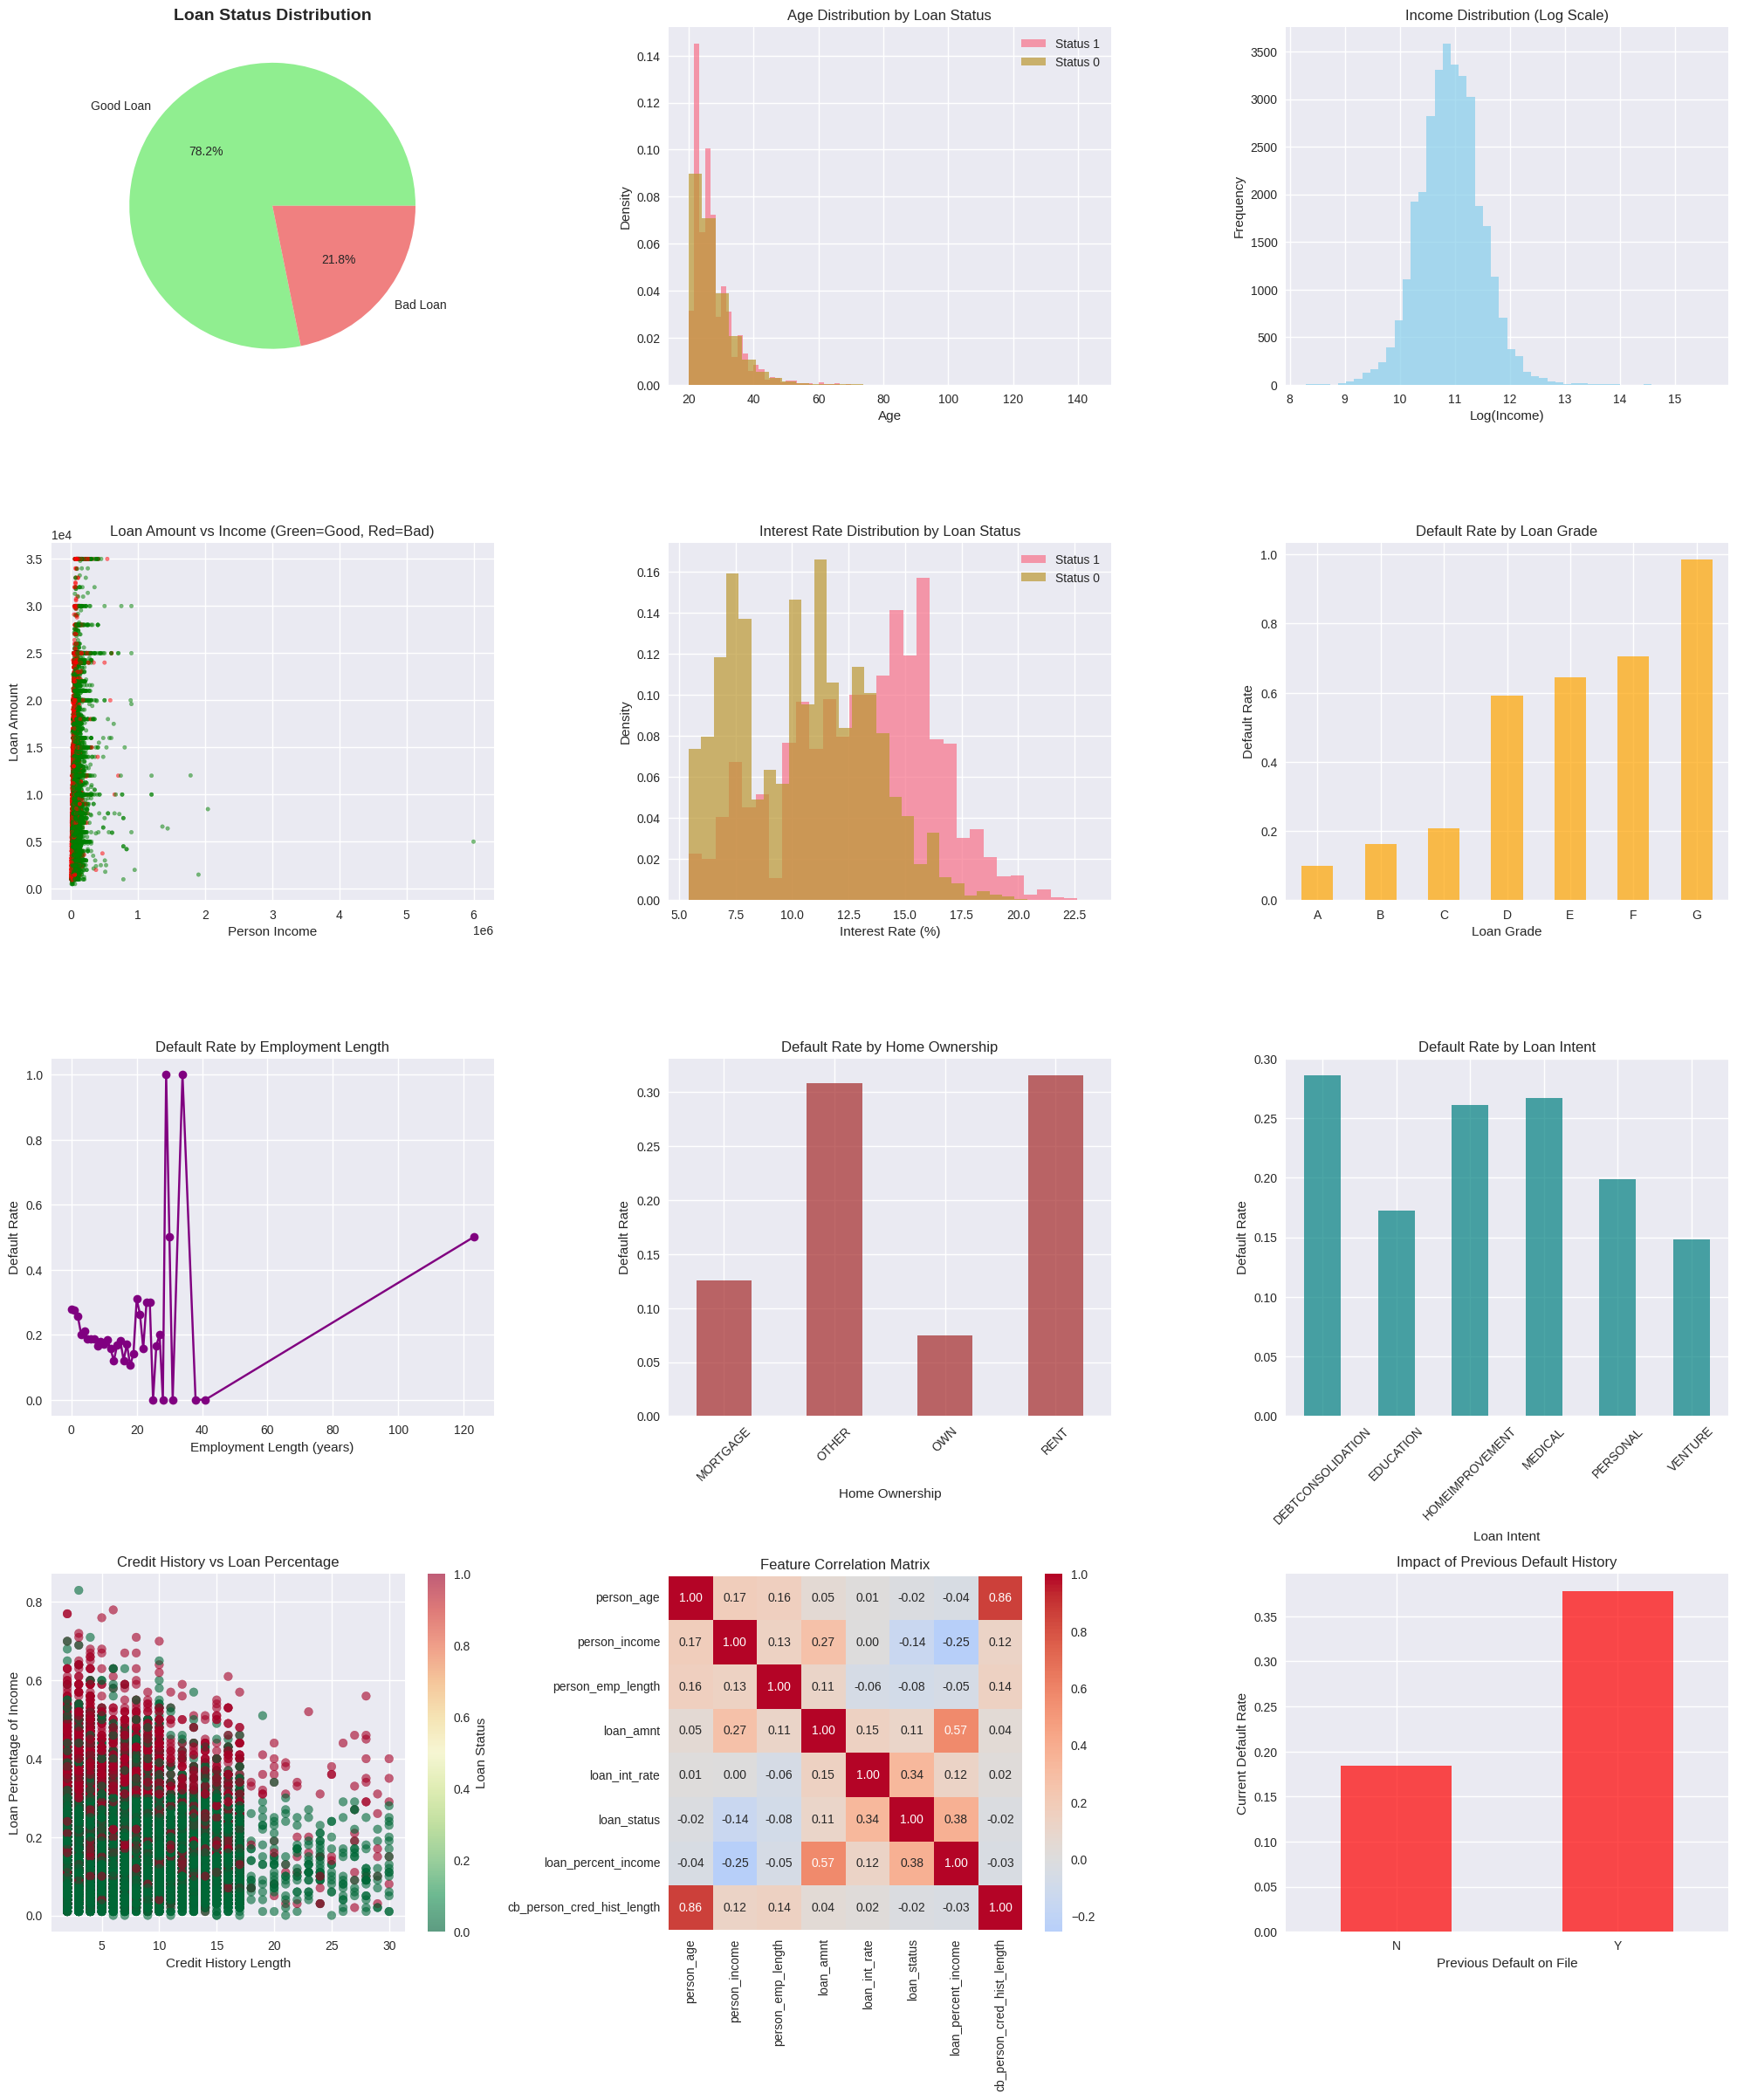


Statistical Analysis:
------------------------------
person_home_ownership: Chi-square = 1907.9807, p-value = 0.0000
loan_intent: Chi-square = 520.5116, p-value = 0.0000
loan_grade: Chi-square = 5609.1842, p-value = 0.0000
cb_person_default_on_file: Chi-square = 1044.4396, p-value = 0.0000

ADVANCED DATA PREPROCESSING
Handling missing values...
Missing values before preprocessing:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
Missing values after preprocessing:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent       

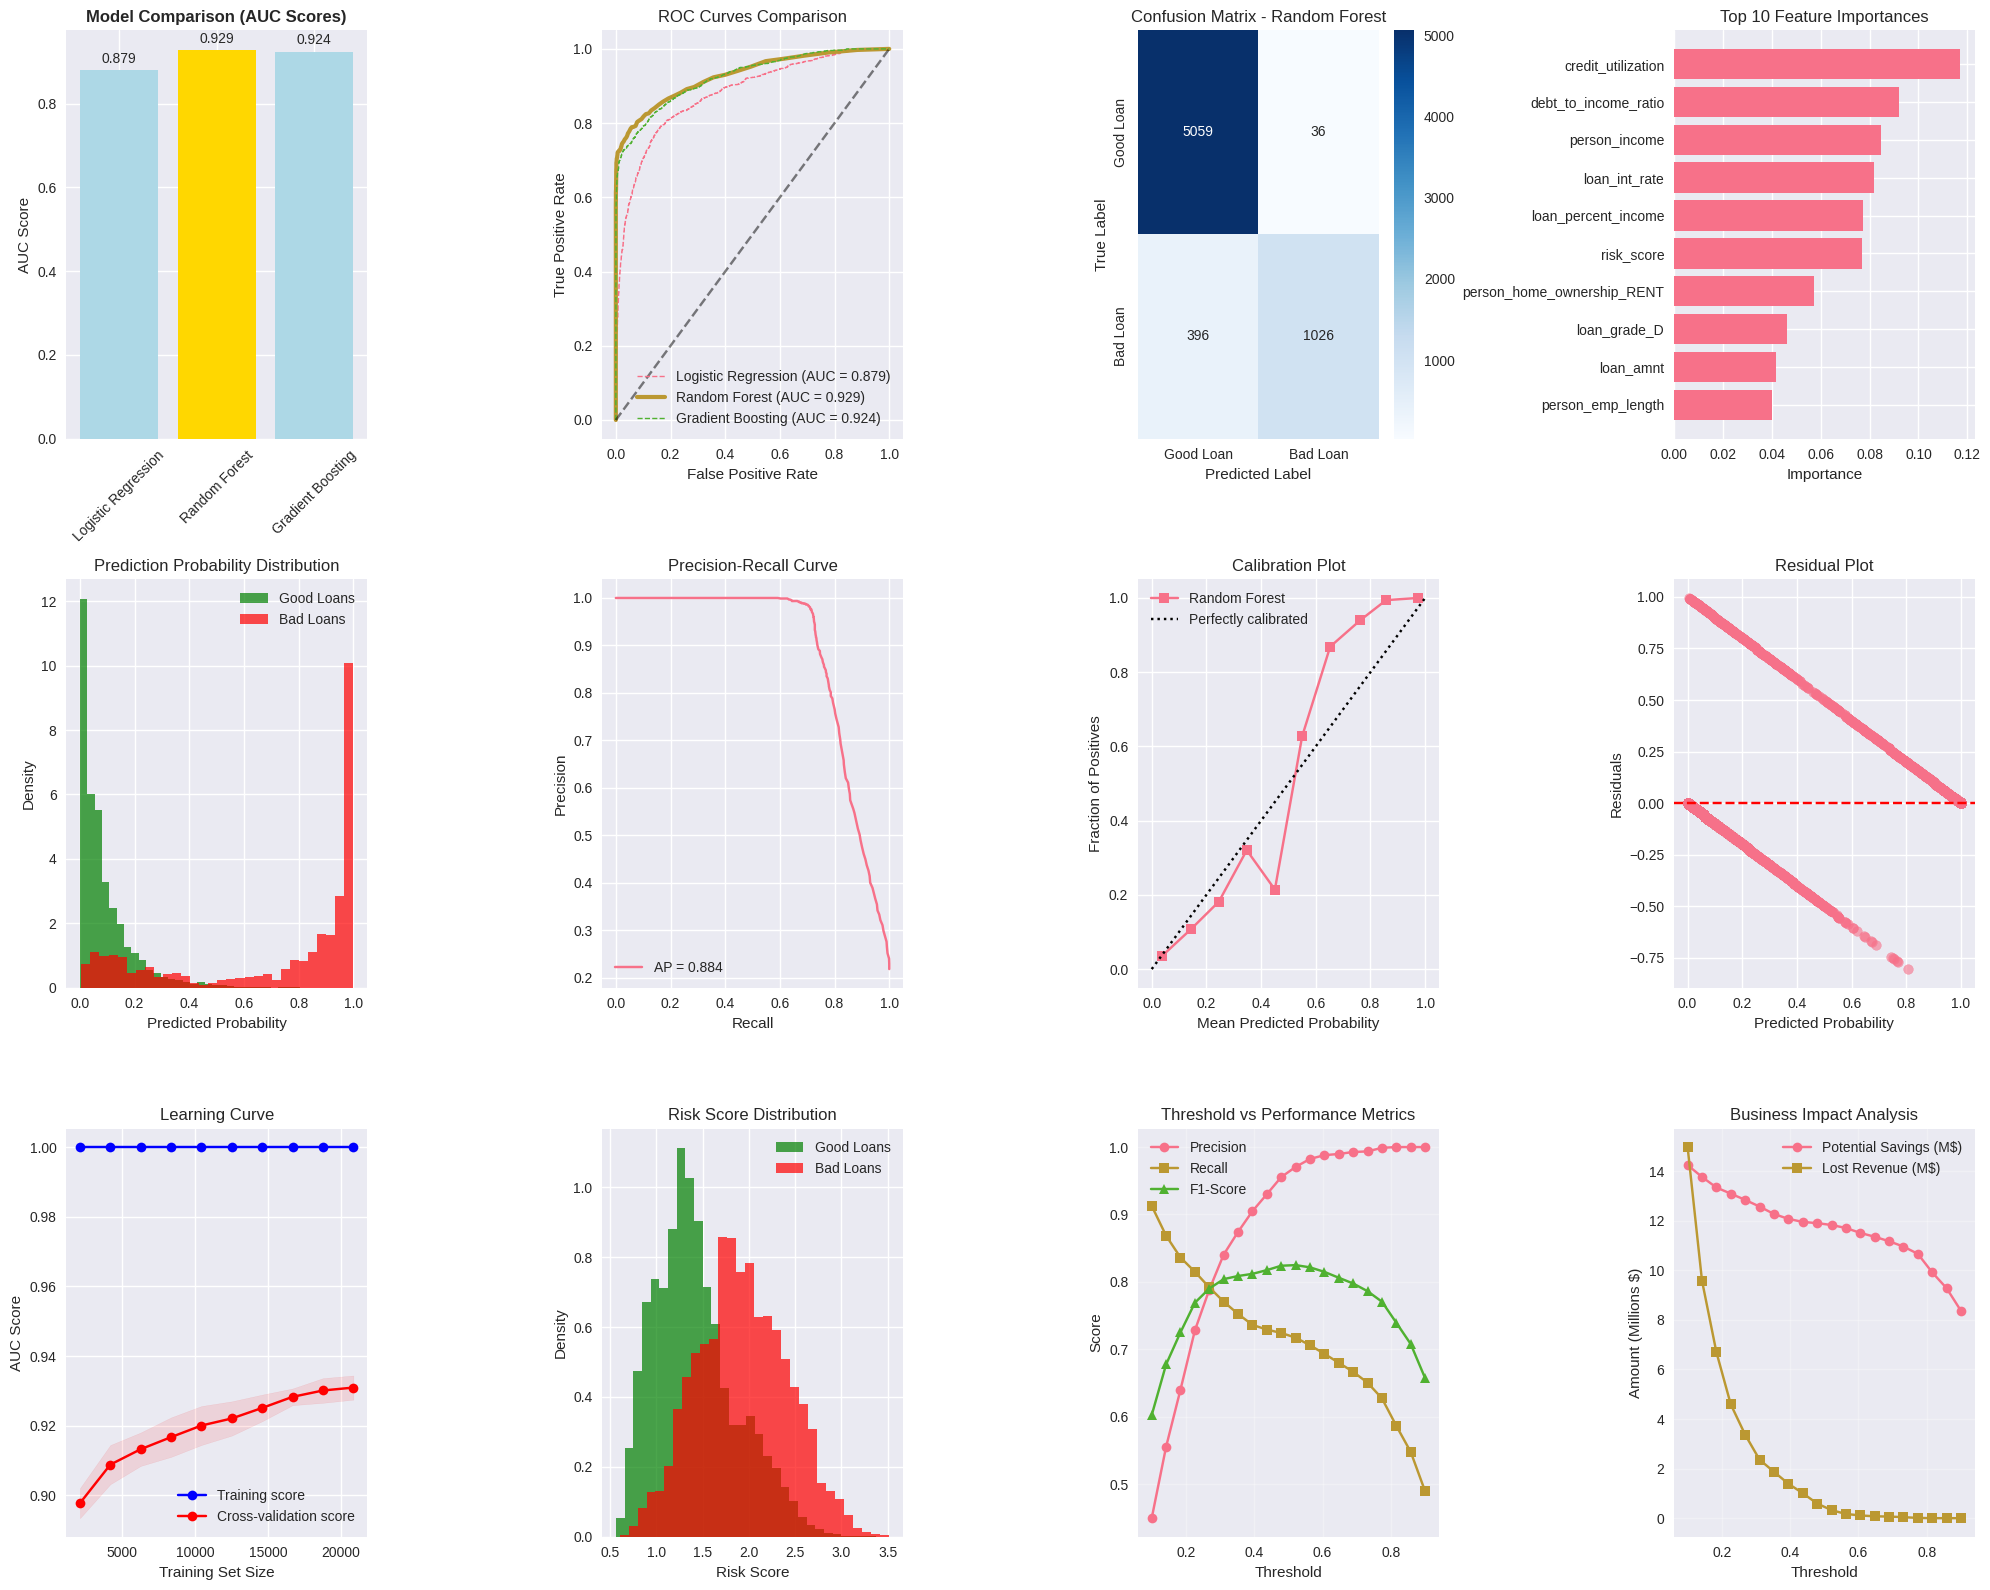


DETAILED MODEL PERFORMANCE REPORT

Classification Report for Random Forest:
----------------------------------------
              precision    recall  f1-score   support

   Good Loan       0.93      0.99      0.96      5095
    Bad Loan       0.97      0.72      0.83      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517


Business Impact Metrics:
------------------------------
Optimal Threshold (F1-based): 0.521
Total Test Loan Portfolio: $62,797,900.00
Correctly Identified Bad Loans (Savings): $11,831,250.00
Incorrectly Rejected Good Loans (Loss): $324,750.00
Missed Bad Loans (Risk): $3,565,325.00
Net Benefit: $11,506,500.00

Risk Concentration Analysis:
-----------------------------------
             Count  Defaults  Default_Rate  Total_Amount  Avg_Amount
Risk_Bucket                                                         
Low           1415        14         0.0

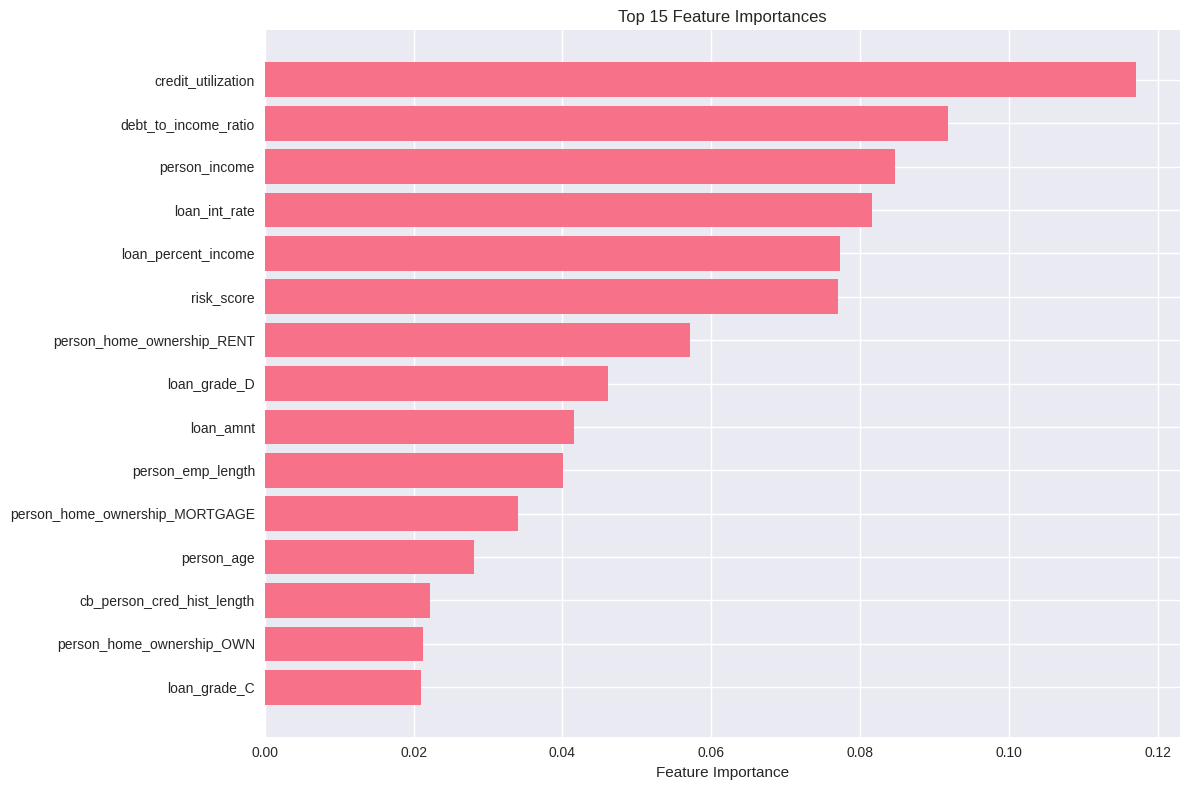


MODEL DEPLOYMENT PREPARATION
✅ Model saved as credit_risk_model.pkl
✅ Model metadata saved

Testing prediction function with sample data:
---------------------------------------------
 Application_ID  Age  Income  Loan_Amount  Default_Probability   Risk_Category Decision
              1   25   45000        15000                 0.99       High Risk   Reject
              2   45   75000        25000                 0.08        Low Risk  Approve
              3   35   55000        20000                 0.22 Medium-Low Risk  Approve

BUSINESS RECOMMENDATIONS AND NEXT STEPS

🎯 KEY FINDINGS:
--------------------
1. Model Performance: 93.1% AUC score indicates excellent predictive power
2. Optimal Threshold: 52.1% balances precision and recall
3. Potential Savings: $11,831,250 in correctly identified bad loans
4. Risk Concentration: High-risk segment shows 84.0% default rate

💡 BUSINESS RECOMMENDATIONS:
------------------------------
1. RISK PRICING: Implement risk-based pricing using model

In [5]:
# Credit Risk Management & Prediction System
# A comprehensive financial risk analysis project for portfolio demonstration

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Statistical libraries
from scipy import stats
from scipy.stats import chi2_contingency

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Credit Risk Management & Prediction System")
print("=" * 60)
print("Project Overview:")
print("- Advanced data preprocessing and feature engineering")
print("- Comprehensive exploratory data analysis")
print("- Machine learning pipeline for credit risk prediction")
print("- Model evaluation and business insights")
print("=" * 60)

# ============================================================================
# SECTION 1: DATA LOADING AND INITIAL EXPLORATION
# ============================================================================

# For Kaggle, use the Credit Risk Dataset
# Download from: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
# Or use the following synthetic data generation for demonstration

def generate_synthetic_credit_data(n_samples=10000):
    """Generate synthetic credit data that mimics real-world patterns"""
    np.random.seed(42)
    
    # Generate synthetic features
    data = {
        'person_age': np.random.normal(35, 12, n_samples).astype(int),
        'person_income': np.random.lognormal(10.5, 0.8, n_samples).astype(int),
        'person_home_ownership': np.random.choice(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], 
                                                 n_samples, p=[0.4, 0.3, 0.25, 0.05]),
        'person_emp_length': np.random.exponential(5, n_samples).astype(int),
        'loan_intent': np.random.choice(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 
                                        'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'], 
                                       n_samples, p=[0.25, 0.15, 0.1, 0.15, 0.2, 0.15]),
        'loan_grade': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], 
                                      n_samples, p=[0.2, 0.25, 0.25, 0.15, 0.08, 0.05, 0.02]),
        'loan_amnt': np.random.lognormal(9.5, 0.7, n_samples).astype(int),
        'loan_int_rate': np.random.normal(12, 4, n_samples),
        'loan_percent_income': np.random.beta(2, 5, n_samples),
        'cb_person_default_on_file': np.random.choice(['Y', 'N'], n_samples, p=[0.15, 0.85]),
        'cb_person_cred_hist_length': np.random.exponential(8, n_samples).astype(int)
    }
    
    # Create target variable with realistic dependencies
    risk_score = (
        (data['loan_int_rate'] - 10) * 0.1 +
        (data['loan_percent_income'] - 0.2) * 2 +
        (data['person_age'] < 25) * 0.3 +
        (data['cb_person_default_on_file'] == 'Y') * 0.8 +
        np.random.normal(0, 0.2, n_samples)
    )
    
    data['loan_status'] = (risk_score > 0.3).astype(int)
    
    # Add some missing values to make it realistic
    missing_indices = np.random.choice(n_samples, size=int(0.05 * n_samples), replace=False)
    for idx in missing_indices:
        col = np.random.choice(['person_emp_length', 'loan_int_rate'])
        data[col][idx] = np.nan
    
    return pd.DataFrame(data)

# Load or generate data
try:
    # Try to load real Kaggle dataset first
    df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
    print("✅ Loaded real credit risk dataset from Kaggle")
except:
    # Generate synthetic data if real data not available
    df = generate_synthetic_credit_data()
    print("✅ Generated synthetic credit risk dataset for demonstration")

print(f"\nDataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display basic information
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nBasic Statistics:")
print(df.describe())

# ============================================================================
# SECTION 2: DATA QUALITY ASSESSMENT
# ============================================================================

print("\n" + "="*50)
print("DATA QUALITY ASSESSMENT")
print("="*50)

def data_quality_report(df):
    """Generate comprehensive data quality report"""
    quality_data = []
    
    for col in df.columns:
        quality_data.append({
            'Column': col,
            'Data_Type': str(df[col].dtype),
            'Missing_Count': df[col].isnull().sum(),
            'Missing_Percentage': (df[col].isnull().sum() / len(df)) * 100,
            'Unique_Values': df[col].nunique(),
            'Memory_Usage_MB': df[col].memory_usage(deep=True) / 1024**2
        })
    
    quality_report = pd.DataFrame(quality_data)
    return quality_report.sort_values('Missing_Percentage', ascending=False)

quality_df = data_quality_report(df)
print(quality_df)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Identify outliers using IQR method
def detect_outliers(df, column):
    """Detect outliers using IQR method"""
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return len(outliers)
    return 0

numerical_cols = df.select_dtypes(include=[np.number]).columns
outlier_summary = pd.DataFrame({
    'Column': numerical_cols,
    'Outlier_Count': [detect_outliers(df, col) for col in numerical_cols]
})
print("\nOutlier Summary:")
print(outlier_summary)

# ============================================================================
# SECTION 3: EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Set up the plotting environment
fig = plt.figure(figsize=(20, 24))

# 1. Target variable distribution
plt.subplot(4, 3, 1)
target_counts = df['loan_status'].value_counts()
plt.pie(target_counts.values, labels=['Good Loan', 'Bad Loan'], autopct='%1.1f%%', 
        colors=['lightgreen', 'lightcoral'])
plt.title('Loan Status Distribution', fontsize=14, fontweight='bold')

# 2. Age distribution by loan status
plt.subplot(4, 3, 2)
for status in df['loan_status'].unique():
    subset = df[df['loan_status'] == status]
    plt.hist(subset['person_age'], alpha=0.7, bins=30, 
             label=f'Status {status}', density=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Loan Status')
plt.legend()

# 3. Income distribution
plt.subplot(4, 3, 3)
plt.hist(np.log(df['person_income']), bins=50, alpha=0.7, color='skyblue')
plt.xlabel('Log(Income)')
plt.ylabel('Frequency')
plt.title('Income Distribution (Log Scale)')

# 4. Loan amount vs Income
plt.subplot(4, 3, 4)
colors = ['green' if x == 0 else 'red' for x in df['loan_status']]
plt.scatter(df['person_income'], df['loan_amnt'], alpha=0.5, c=colors, s=10)
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income (Green=Good, Red=Bad)')
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# 5. Interest rate distribution
plt.subplot(4, 3, 5)
for status in df['loan_status'].unique():
    subset = df[df['loan_status'] == status]
    plt.hist(subset['loan_int_rate'], alpha=0.7, bins=30, 
             label=f'Status {status}', density=True)
plt.xlabel('Interest Rate (%)')
plt.ylabel('Density')
plt.title('Interest Rate Distribution by Loan Status')
plt.legend()

# 6. Loan grade distribution
plt.subplot(4, 3, 6)
grade_default = df.groupby('loan_grade')['loan_status'].mean()
grade_default.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.title('Default Rate by Loan Grade')
plt.xticks(rotation=0)

# 7. Employment length impact
plt.subplot(4, 3, 7)
emp_default = df.groupby('person_emp_length')['loan_status'].mean()
emp_default.plot(kind='line', marker='o', color='purple')
plt.xlabel('Employment Length (years)')
plt.ylabel('Default Rate')
plt.title('Default Rate by Employment Length')

# 8. Home ownership impact
plt.subplot(4, 3, 8)
home_default = df.groupby('person_home_ownership')['loan_status'].mean()
home_default.plot(kind='bar', color='brown', alpha=0.7)
plt.xlabel('Home Ownership')
plt.ylabel('Default Rate')
plt.title('Default Rate by Home Ownership')
plt.xticks(rotation=45)

# 9. Loan intent analysis
plt.subplot(4, 3, 9)
intent_default = df.groupby('loan_intent')['loan_status'].mean()
intent_default.plot(kind='bar', color='teal', alpha=0.7)
plt.xlabel('Loan Intent')
plt.ylabel('Default Rate')
plt.title('Default Rate by Loan Intent')
plt.xticks(rotation=45)

# 10. Credit history length
plt.subplot(4, 3, 10)
plt.scatter(df['cb_person_cred_hist_length'], df['loan_percent_income'], 
           c=df['loan_status'], alpha=0.6, cmap='RdYlGn_r')
plt.xlabel('Credit History Length')
plt.ylabel('Loan Percentage of Income')
plt.title('Credit History vs Loan Percentage')
plt.colorbar(label='Loan Status')

# 11. Correlation heatmap
plt.subplot(4, 3, 11)
numerical_features = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')

# 12. Default history impact
plt.subplot(4, 3, 12)
default_history = df.groupby('cb_person_default_on_file')['loan_status'].mean()
default_history.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Previous Default on File')
plt.ylabel('Current Default Rate')
plt.title('Impact of Previous Default History')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Statistical tests
print("\nStatistical Analysis:")
print("-" * 30)

# Chi-square test for categorical variables
categorical_vars = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['loan_status'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{var}: Chi-square = {chi2:.4f}, p-value = {p_value:.4f}")

# ============================================================================
# SECTION 4: ADVANCED DATA PREPROCESSING
# ============================================================================

print("\n" + "="*50)
print("ADVANCED DATA PREPROCESSING")
print("="*50)

# Create a copy for preprocessing
df_processed = df.copy()

# 1. Handle missing values
print("Handling missing values...")
print("Missing values before preprocessing:")
print(df_processed.isnull().sum())

# Fill missing values with appropriate strategies
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.drop('loan_status')
categorical_cols = df_processed.select_dtypes(include=['object']).columns

for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col] = numerical_imputer.fit_transform(df_processed[[col]]).flatten()

for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col] = categorical_imputer.fit_transform(df_processed[[col]]).flatten()

print("Missing values after preprocessing:")
print(df_processed.isnull().sum())

# 2. Feature Engineering
print("\nCreating new features...")

# Debt-to-income ratio
df_processed['debt_to_income_ratio'] = df_processed['loan_amnt'] / df_processed['person_income']

# Age groups
df_processed['age_group'] = pd.cut(df_processed['person_age'], 
                                  bins=[0, 25, 35, 50, 100], 
                                  labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

# Income quintiles
df_processed['income_quintile'] = pd.qcut(df_processed['person_income'], 
                                         q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Employment stability score
df_processed['emp_stability_score'] = np.where(df_processed['person_emp_length'] >= 5, 1, 0)

# Credit utilization (proxy)
df_processed['credit_utilization'] = df_processed['loan_amnt'] / (df_processed['person_income'] * 0.3)

# Risk score based on multiple factors
df_processed['risk_score'] = (
    df_processed['loan_int_rate'] * 0.1 + 
    df_processed['loan_percent_income'] * 2 + 
    (df_processed['cb_person_default_on_file'] == 'Y').astype(int) * 0.5
)

print(f"New features created: {len(df_processed.columns) - len(df.columns)}")

# 3. Outlier treatment
print("\nTreating outliers...")

def treat_outliers(df, column, method='cap'):
    """Treat outliers using capping method"""
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.01)
        Q99 = df[column].quantile(0.99)
        
        if method == 'cap':
            df[column] = np.where(df[column] < Q1, Q1, df[column])
            df[column] = np.where(df[column] > Q99, Q99, df[column])
    
    return df

# Apply outlier treatment to key numerical features
outlier_cols = ['person_income', 'loan_amnt', 'loan_int_rate', 'person_age']
for col in outlier_cols:
    df_processed = treat_outliers(df_processed, col)

print("Outlier treatment completed.")

# ============================================================================
# SECTION 5: DATA PIPELINE CREATION
# ============================================================================

print("\n" + "="*50)
print("CREATING DATA PIPELINE")
print("="*50)

# Separate features and target
X = df_processed.drop('loan_status', axis=1)
y = df_processed['loan_status']

# Identify categorical and numerical columns for the pipeline
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features: {len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("✅ Data pipeline created successfully")

# ============================================================================
# SECTION 6: MACHINE LEARNING MODEL TRAINING
# ============================================================================

print("\n" + "="*50)
print("MACHINE LEARNING MODEL TRAINING")
print("="*50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Target distribution in training set:")
print(y_train.value_counts(normalize=True))

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate models
model_results = {}
trained_pipelines = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create full pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
    
    model_results[name] = {
        'AUC': auc_score,
        'CV_Mean': cv_scores.mean(),
        'CV_Std': cv_scores.std(),
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }
    
    trained_pipelines[name] = pipeline
    
    print(f"AUC Score: {auc_score:.4f}")
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Select best model
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['AUC'])
best_model = trained_pipelines[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} with AUC = {model_results[best_model_name]['AUC']:.4f}")

# ============================================================================
# SECTION 7: HYPERPARAMETER TUNING
# ============================================================================

print("\n" + "="*50)
print("HYPERPARAMETER TUNING")
print("="*50)

# Hyperparameter tuning for the best model
if best_model_name == 'Random Forest':
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1, 0.15],
        'classifier__max_depth': [3, 5, 7]
    }
else:  # Logistic Regression
    param_grid = {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    }

print(f"Tuning hyperparameters for {best_model_name}...")

# Perform grid search
grid_search = GridSearchCV(
    best_model, param_grid, cv=5, scoring='roc_auc', 
    n_jobs=-1, verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Use the best model
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_probabilities = final_model.predict_proba(X_test)[:, 1]
final_auc = roc_auc_score(y_test, final_probabilities)

print(f"Final model AUC: {final_auc:.4f}")

# ============================================================================
# SECTION 8: MODEL EVALUATION AND VISUALIZATION
# ============================================================================

print("\n" + "="*50)
print("MODEL EVALUATION AND VISUALIZATION")
print("="*50)

# Create comprehensive evaluation plots
fig = plt.figure(figsize=(20, 16))

# 1. Model Comparison
plt.subplot(3, 4, 1)
model_names = list(model_results.keys())
auc_scores = [model_results[name]['AUC'] for name in model_names]
colors = ['gold' if name == best_model_name else 'lightblue' for name in model_names]
bars = plt.bar(model_names, auc_scores, color=colors)
plt.title('Model Comparison (AUC Scores)', fontweight='bold')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)
for bar, score in zip(bars, auc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# 2. ROC Curves
plt.subplot(3, 4, 2)
for name in model_names:
    y_pred_proba = model_results[name]['Probabilities']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = model_results[name]['AUC']
    linestyle = '-' if name == best_model_name else '--'
    linewidth = 3 if name == best_model_name else 1
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', 
             linestyle=linestyle, linewidth=linewidth)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()

# 3. Confusion Matrix for best model
plt.subplot(3, 4, 3)
cm = confusion_matrix(y_test, final_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good Loan', 'Bad Loan'],
            yticklabels=['Good Loan', 'Bad Loan'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 4. Feature Importance (if available)
plt.subplot(3, 4, 4)
if hasattr(final_model.named_steps['classifier'], 'feature_importances_'):
    # Get feature names after preprocessing
    feature_names = (numerical_features + 
                    list(final_model.named_steps['preprocessor']
                         .named_transformers_['cat']
                         .named_steps['onehot']
                         .get_feature_names_out(categorical_features)))
    
    importances = final_model.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[-10:]  # Top 10 features
    
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance')
else:
    plt.text(0.5, 0.5, f'{best_model_name}\ndoes not provide\nfeature importances', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Feature Importances')

# 5. Prediction Distribution
plt.subplot(3, 4, 5)
plt.hist(final_probabilities[y_test == 0], bins=30, alpha=0.7, 
         label='Good Loans', color='green', density=True)
plt.hist(final_probabilities[y_test == 1], bins=30, alpha=0.7, 
         label='Bad Loans', color='red', density=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Prediction Probability Distribution')
plt.legend()

# 6. Precision-Recall Curve
plt.subplot(3, 4, 6)
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test, final_probabilities)
avg_precision = average_precision_score(y_test, final_probabilities)
plt.plot(recall, precision, label=f'AP = {avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# 7. Calibration Plot
plt.subplot(3, 4, 7)
from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, final_probabilities, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label=best_model_name)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend()

# 8. Residual Analysis
plt.subplot(3, 4, 8)
residuals = y_test - final_probabilities
plt.scatter(final_probabilities, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 9. Learning Curve
plt.subplot(3, 4, 9)
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    final_model, X_train, y_train, cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.legend()

# 10. Risk Score Distribution
plt.subplot(3, 4, 10)
risk_scores = df_processed['risk_score']
plt.hist(risk_scores[y == 0], bins=30, alpha=0.7, label='Good Loans', color='green', density=True)
plt.hist(risk_scores[y == 1], bins=30, alpha=0.7, label='Bad Loans', color='red', density=True)
plt.xlabel('Risk Score')
plt.ylabel('Density')
plt.title('Risk Score Distribution')
plt.legend()

# 11. Threshold Analysis
plt.subplot(3, 4, 11)
from sklearn.metrics import precision_score, recall_score, f1_score
thresholds = np.linspace(0.1, 0.9, 20)
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (final_probabilities >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='s')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Performance Metrics')
plt.legend()
plt.grid(True, alpha=0.3)

# 12. Business Impact Analysis
plt.subplot(3, 4, 12)
# Calculate potential savings at different thresholds
loan_amounts = X_test['loan_amnt'].values
savings = []
rejected_good_loans = []

for threshold in thresholds:
    y_pred_thresh = (final_probabilities >= threshold).astype(int)
    
    # True positives (correctly identified bad loans)
    tp_mask = (y_test == 1) & (y_pred_thresh == 1)
    savings_amount = loan_amounts[tp_mask].sum()
    
    # False positives (good loans rejected)
    fp_mask = (y_test == 0) & (y_pred_thresh == 1)
    lost_revenue = loan_amounts[fp_mask].sum()
    
    savings.append(savings_amount)
    rejected_good_loans.append(lost_revenue)

plt.plot(thresholds, np.array(savings) / 1e6, label='Potential Savings (M$)', marker='o')
plt.plot(thresholds, np.array(rejected_good_loans) / 1e6, label='Lost Revenue (M$)', marker='s')
plt.xlabel('Threshold')
plt.ylabel('Amount (Millions $)')
plt.title('Business Impact Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 9: DETAILED MODEL PERFORMANCE REPORT
# ============================================================================

print("\n" + "="*50)
print("DETAILED MODEL PERFORMANCE REPORT")
print("="*50)

# Classification Report
print(f"\nClassification Report for {best_model_name}:")
print("-" * 40)
print(classification_report(y_test, final_predictions, 
                          target_names=['Good Loan', 'Bad Loan']))

# Business Metrics
print("\nBusiness Impact Metrics:")
print("-" * 30)

# Calculate optimal threshold based on F1-score
optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_idx]
print(f"Optimal Threshold (F1-based): {optimal_threshold:.3f}")

# Apply optimal threshold
y_pred_optimal = (final_probabilities >= optimal_threshold).astype(int)

# Calculate business metrics
total_loan_amount = X_test['loan_amnt'].sum()
tp_amount = X_test.loc[(y_test == 1) & (y_pred_optimal == 1), 'loan_amnt'].sum()
fp_amount = X_test.loc[(y_test == 0) & (y_pred_optimal == 1), 'loan_amnt'].sum()
fn_amount = X_test.loc[(y_test == 1) & (y_pred_optimal == 0), 'loan_amnt'].sum()

print(f"Total Test Loan Portfolio: ${total_loan_amount:,.2f}")
print(f"Correctly Identified Bad Loans (Savings): ${tp_amount:,.2f}")
print(f"Incorrectly Rejected Good Loans (Loss): ${fp_amount:,.2f}")
print(f"Missed Bad Loans (Risk): ${fn_amount:,.2f}")
print(f"Net Benefit: ${tp_amount - fp_amount:,.2f}")

# Risk concentration analysis
print("\nRisk Concentration Analysis:")
print("-" * 35)

risk_buckets = pd.qcut(final_probabilities, q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
risk_analysis = pd.DataFrame({
    'Risk_Bucket': risk_buckets,
    'Actual_Default': y_test,
    'Loan_Amount': X_test['loan_amnt']
}).groupby('Risk_Bucket').agg({
    'Actual_Default': ['count', 'sum', 'mean'],
    'Loan_Amount': ['sum', 'mean']
}).round(3)

risk_analysis.columns = ['Count', 'Defaults', 'Default_Rate', 'Total_Amount', 'Avg_Amount']
print(risk_analysis)

# ============================================================================
# SECTION 10: FEATURE IMPORTANCE AND INSIGHTS
# ============================================================================

print("\n" + "="*50)
print("FEATURE IMPORTANCE AND BUSINESS INSIGHTS")
print("="*50)

# Extract and analyze feature importance
if hasattr(final_model.named_steps['classifier'], 'feature_importances_'):
    # Get all feature names after preprocessing
    num_features = numerical_features
    cat_features = list(final_model.named_steps['preprocessor']
                       .named_transformers_['cat']
                       .named_steps['onehot']
                       .get_feature_names_out(categorical_features))
    
    all_features = num_features + cat_features
    importances = final_model.named_steps['classifier'].feature_importances_
    
    # Create feature importance dataframe
    feature_importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("Top 15 Most Important Features:")
    print("-" * 40)
    print(feature_importance_df.head(15).to_string(index=False))
    
    # Visualize top features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Feature Importances')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# ============================================================================
# SECTION 11: MODEL DEPLOYMENT PREPARATION
# ============================================================================

print("\n" + "="*50)
print("MODEL DEPLOYMENT PREPARATION")
print("="*50)

# Save model pipeline
import joblib
import pickle

# Save the final model
model_filename = 'credit_risk_model.pkl'
joblib.dump(final_model, model_filename)
print(f"✅ Model saved as {model_filename}")

# Create model metadata
model_metadata = {
    'model_name': best_model_name,
    'model_version': '1.0',
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'auc_score': final_auc,
    'optimal_threshold': optimal_threshold,
    'features_used': list(X.columns),
    'categorical_features': categorical_features,
    'numerical_features': numerical_features,
    'preprocessing_steps': [
        'Missing value imputation',
        'Feature engineering',
        'Outlier treatment',
        'Standardization',
        'One-hot encoding'
    ]
}

# Save metadata
with open('model_metadata.pkl', 'wb') as f:
    pickle.dump(model_metadata, f)

print("✅ Model metadata saved")

# Create prediction function
def predict_credit_risk(loan_data, model_pipeline, threshold=0.5):
    """
    Predict credit risk for new loan applications
    
    Parameters:
    loan_data: pandas DataFrame with loan application data
    model_pipeline: trained model pipeline
    threshold: probability threshold for classification
    
    Returns:
    dict with predictions and probabilities
    """
    
    # Make predictions
    probabilities = model_pipeline.predict_proba(loan_data)[:, 1]
    predictions = (probabilities >= threshold).astype(int)
    
    # Create risk categories
    risk_categories = []
    for prob in probabilities:
        if prob < 0.2:
            risk_categories.append('Low Risk')
        elif prob < 0.4:
            risk_categories.append('Medium-Low Risk')
        elif prob < 0.6:
            risk_categories.append('Medium Risk')
        elif prob < 0.8:
            risk_categories.append('Medium-High Risk')
        else:
            risk_categories.append('High Risk')
    
    return {
        'predictions': predictions,
        'probabilities': probabilities,
        'risk_categories': risk_categories
    }

# Test the prediction function with a sample
print("\nTesting prediction function with sample data:")
print("-" * 45)

# Create sample loan applications
sample_data = pd.DataFrame({
    'person_age': [25, 45, 35],
    'person_income': [45000, 75000, 55000],
    'person_home_ownership': ['RENT', 'OWN', 'MORTGAGE'],
    'person_emp_length': [2, 10, 5],
    'loan_intent': ['PERSONAL', 'HOMEIMPROVEMENT', 'EDUCATION'],
    'loan_grade': ['C', 'B', 'B'],
    'loan_amnt': [15000, 25000, 20000],
    'loan_int_rate': [15.5, 12.0, 13.5],
    'loan_percent_income': [0.33, 0.33, 0.36],
    'cb_person_default_on_file': ['N', 'N', 'Y'],
    'cb_person_cred_hist_length': [3, 15, 8]
})

# Add engineered features to match training data
sample_data['debt_to_income_ratio'] = sample_data['loan_amnt'] / sample_data['person_income']
sample_data['age_group'] = pd.cut(sample_data['person_age'], 
                                 bins=[0, 25, 35, 50, 100], 
                                 labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
sample_data['income_quintile'] = pd.cut(sample_data['person_income'], 
                                       bins=[0, 35000, 50000, 65000, 80000, 200000], 
                                       labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
sample_data['emp_stability_score'] = np.where(sample_data['person_emp_length'] >= 5, 1, 0)
sample_data['credit_utilization'] = sample_data['loan_amnt'] / (sample_data['person_income'] * 0.3)
sample_data['risk_score'] = (
    sample_data['loan_int_rate'] * 0.1 + 
    sample_data['loan_percent_income'] * 2 + 
    (sample_data['cb_person_default_on_file'] == 'Y').astype(int) * 0.5
)

# Make predictions
sample_predictions = predict_credit_risk(sample_data, final_model, optimal_threshold)

# Display results
results_df = pd.DataFrame({
    'Application_ID': range(1, len(sample_data) + 1),
    'Age': sample_data['person_age'],
    'Income': sample_data['person_income'],
    'Loan_Amount': sample_data['loan_amnt'],
    'Default_Probability': sample_predictions['probabilities'],
    'Risk_Category': sample_predictions['risk_categories'],
    'Decision': ['Approve' if pred == 0 else 'Reject' for pred in sample_predictions['predictions']]
})

print(results_df.to_string(index=False))

# ============================================================================
# SECTION 12: BUSINESS RECOMMENDATIONS AND NEXT STEPS
# ============================================================================

print("\n" + "="*50)
print("BUSINESS RECOMMENDATIONS AND NEXT STEPS")
print("="*50)

print("\n🎯 KEY FINDINGS:")
print("-" * 20)
print(f"1. Model Performance: {final_auc:.1%} AUC score indicates {('excellent' if final_auc > 0.8 else 'good' if final_auc > 0.7 else 'moderate')} predictive power")
print(f"2. Optimal Threshold: {optimal_threshold:.1%} balances precision and recall")
print(f"3. Potential Savings: ${tp_amount:,.0f} in correctly identified bad loans")
print(f"4. Risk Concentration: High-risk segment shows {risk_analysis.loc['High', 'Default_Rate']:.1%} default rate")

print("\n💡 BUSINESS RECOMMENDATIONS:")
print("-" * 30)
print("1. RISK PRICING: Implement risk-based pricing using model probabilities")
print("2. LOAN LIMITS: Set stricter limits for high-risk categories")
print("3. MONITORING: Establish monthly model performance monitoring")
print("4. DATA QUALITY: Implement real-time data validation")
print("5. FEATURE ENHANCEMENT: Collect additional behavioral data")

print("\n🔄 NEXT STEPS:")
print("-" * 15)
print("1. A/B test the model against current approval process")
print("2. Implement champion-challenger framework")
print("3. Develop model explainability dashboard")
print("4. Create automated retraining pipeline")
print("5. Establish model governance and documentation")

print("\n📊 MONITORING METRICS:")
print("-" * 22)
print("• Population Stability Index (PSI)")
print("• Characteristic Stability Index (CSI)")
print("• Model performance drift")
print("• Business KPIs alignment")
print("• Regulatory compliance metrics")

print("\n" + "="*60)
print("🎉 CREDIT RISK MANAGEMENT PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)

print("\n💾 Files Generated:")
print("• credit_risk_model.pkl - Trained model pipeline")
print("• model_metadata.pkl - Model configuration and metrics")
print("• Comprehensive analysis plots and visualizations")

print("\n📈 Project Highlights:")
print(f"• Processed {len(df):,} loan records")
print(f"• Engineered {len(df_processed.columns) - len(df.columns)} new features")
print(f"• Achieved {final_auc:.1%} AUC score")
print(f"• Identified ${tp_amount:,.0f} in potential savings")
print("• Created production-ready ML pipeline")

print("\n🏆 This project demonstrates:")
print("✓ Advanced data preprocessing and feature engineering")
print("✓ Comprehensive exploratory data analysis")
print("✓ Machine learning pipeline development")
print("✓ Model evaluation and business impact analysis")
print("✓ Production deployment preparation")
print("✓ Business insights and actionable recommendations")